# Signal Detection

It is also possible to use a lower complexity detector, for example:
\begin{align}
\frac{1}{N} \sum_{d=0}^{N-1} \Re\left\{\rho(d)\right\}
\stackrel{\hat{A}=1}{>} \gamma^{\prime\prime}
\end{align}
which is agnostic to the number of delays,
but this would come at some performance loss
compared with a detector cognizant of the number of delays,
such as
\begin{align}
\max_{d=0,\ldots,N-1} \Re\left\{\rho(d)\right\}
\stackrel{\hat{A}=1}{>} \gamma^\prime
\end{align}
in case there is only one delay.


Given a target false alarm probability $P_{\text{FA}}$

* The detection probability for the "max detector" is
\begin{align}
P_{\text{d}} \approx Q( Q^{-1}( P_{\text{FA}}/N ) - \sqrt{\textsf{SNR}/2})
\end{align}

* The detection probability for the lower-complexity "sum detector" is
\begin{align}
P_{\text{d}} = Q( Q^{-1}( P_{\text{FA}} ) - \sqrt{\textsf{SNR}/2/N})
\end{align}

In [1]:
# calculate detection probability
import numpy as np
import scipy.stats
qfunc = scipy.stats.norm.sf
qfuncinv = scipy.stats.norm.isf

snr_db = np.arange(10,40)
snr =  10**(snr_db*1.0/10)
p_fa = 0.01
N = 127
p_d_max = qfunc(qfuncinv(p_fa/N)-np.sqrt(snr/2))
p_d_sum = qfunc(qfuncinv(p_fa)-np.sqrt(snr/2/N))

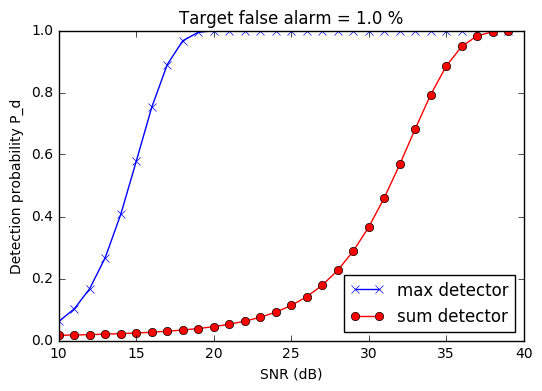

In [2]:
# plot
import matplotlib.pyplot as plt
plt.plot(snr_db,p_d_max,'bx-',label='max detector')
plt.plot(snr_db,p_d_sum,'ro-',label='sum detector')
plt.title(('Target false alarm = %.1f %%' % (p_fa*100)))
plt.xlabel('SNR (dB)')
plt.ylabel('Detection probability P_d')
plt.legend(loc='best')
plt.show()